<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/gg_lab_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  49.4M      0  0:00:01  0:00:01 --:--:-- 49.3M


In [0]:
!unzip -q cats_and_dogs_filtered.zip

In [5]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (831 kB/s)
Selecting previously unselected package tree.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [6]:
!ls -l

total 67008
drwxr-x--- 4 root root     4096 Sep 23  2016 cats_and_dogs_filtered
-rw-r--r-- 1 root root 68606236 Jan  2 13:02 cats_and_dogs_filtered.zip
drwxr-xr-x 1 root root     4096 Dec 18 16:52 sample_data


# 이미지 분류 (cat and dogs)

In [0]:
import os, os.path, shutil
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
!tree -d

.
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
└── sample_data

8 directories


In [0]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [10]:
# 이미지 파일의 명칭 확인
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [11]:
print(len(os.listdir(train_cats_dir)),
      len(os.listdir(train_dogs_dir)),
      len(os.listdir(validation_cats_dir)),
      len(os.listdir(validation_dogs_dir)))

1000 1000 500 500


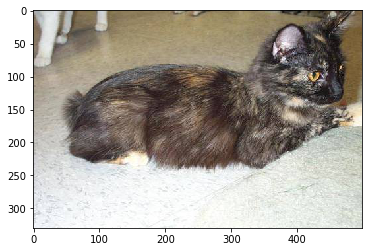

In [12]:
# 임의로 10번쨰 고양이 사진을 그려본다
train_cat_fnames = os.listdir(train_cats_dir)
img_path = os.path.join(train_cats_dir, train_cat_fnames[10])
img = mpimg.imread(img_path)
plt.imshow(img)

In [13]:
# CNN Model 구성
from keras import layers, models, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


Using TensorFlow backend.


In [14]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=train_dir,
                                              target_size=(img_width,img_height),
                                              classes=['dogs','cats'],
                                              class_mode='binary',
                                              batch_size=20)

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = datagen.flow_from_directory(directory=validation_dir,
                                              target_size=(img_width,img_height),
                                              classes=['dogs','cats'],
                                              class_mode='binary',
                                              batch_size=20)

Found 1000 images belonging to 2 classes.


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)




Epoch 1/30





100/100 [==============================] - 23s 228ms/step - loss: 0.6873 - acc: 0.5425 - val_loss: 0.6733 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6587 - acc: 0.5995 - val_loss: 0.6556 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6154 - acc: 0.6560 - val_loss: 0.6004 - val_acc: 0.7030
Epoch 4/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5757 - acc: 0.7105 - val_loss: 0.5880 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5388 - acc: 0.7235 - val_loss: 0.5940 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 7s 75ms/step - loss: 0.5154 - acc: 0.7515 - val_loss: 0.5433 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.4814 - acc: 0.7630 - val_loss: 0.5997 - val_acc: 0.6590
Epoch 8/30
100/100 [==============================] - 7s 75

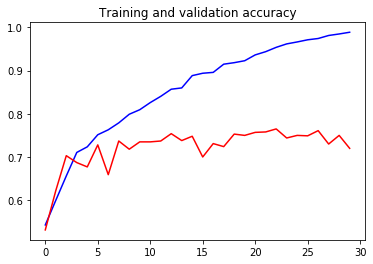

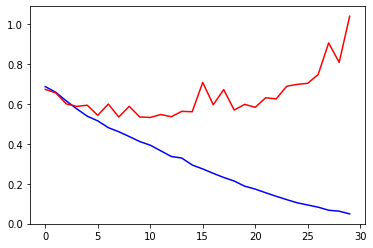

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, c='b')
plt.plot(epochs, val_acc, c='r')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, c='b')
plt.plot(epochs, val_loss, c='r')